In [70]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import pickle
import numpy as np
import tensorflow as tf
import random
from transformers import TFBertModel, BertTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("cahya/bert-base-indonesian-522M")
bert_model = TFBertModel.from_pretrained("cahya/bert-base-indonesian-522M")

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cahya/bert-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [4]:
#Define word, classes, documents and ignore words to a list
words = []
classes = []
documents = []
ignore_words = ['?', '!']

#Load data from .json file
data_file = open('foodricionchatbotdataset/intents.json').read()
intents = json.loads(data_file)

In [5]:
# Preprocess data
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [7]:
# Lemmatize word and stored it in a list
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# stored classes in a list
classes = sorted(list(set(classes)))

#Dump it to pickle to use the chat bot
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

In [8]:
#checking documents
print(len(documents), "documents\n", documents, "\n")

1024 documents
 [([], 'notfound'), ([], 'notfound'), ([], 'notfound'), ([], 'notfound'), ([], 'notfound'), (['Halo'], 'sapaan'), (['Hai'], 'sapaan'), (['Haii'], 'sapaan'), (['Haiii'], 'sapaan'), (['Haiiii'], 'sapaan'), (['Selamat', 'pagi'], 'sapaan'), (['Selamat', 'siang'], 'sapaan'), (['Selamat', 'sore'], 'sapaan'), (['Selamat', 'malam'], 'sapaan'), (['Apa', 'kabar', '?'], 'sapaan'), (['Bagaimana', 'hari', 'Anda', '?'], 'sapaan'), (['Tolong', 'bantu', 'saya'], 'sapaan'), (['mau', 'tanya'], 'sapaan'), (['Hay'], 'sapaan'), (['Hy'], 'sapaan'), (['Hallo'], 'sapaan'), (['Hey'], 'sapaan'), (['Hola'], 'sapaan'), (['Hello'], 'sapaan'), (['Hai'], 'sapaan'), (['p'], 'sapaan'), (['hai'], 'sapaan'), (['halo'], 'sapaan'), (['hay'], 'sapaan'), (['haii'], 'sapaan'), (['mikum'], 'sapaan'), (['assamualaikaum'], 'sapaan'), (['hi'], 'sapaan'), (['dah'], 'penyudahan'), (['sampai', 'jumpa'], 'penyudahan'), (['bye', 'bye'], 'penyudahan'), (['Sampai', 'nanti'], 'penyudahan'), (['Selamat', 'tinggal'], 'penyu

In [9]:
#Checking number of classes and what's in it
print(len(classes), "classes\n", classes, "\n")

209 classes
 ['alergi_gandum', 'alergi_makanan', 'ash', 'asupan_gizi', 'bCarotene', 'buah-buahan', 'camilan_sehat', 'copper', 'detoksifikasi', 'diet', 'diet Paleo', 'diet keto', 'diet vegetarian', 'diet_alkaline', 'diet_detoks', 'diet_seimbang', 'gizi_balita', 'gizi_lansia', 'gluten', 'hidrasi_olahraga', 'hidratasi', 'hidup_sehat', 'intoleransi_laktosa', 'iron', 'kafein', 'kalsium', 'kalsium_manfaat', 'karbohidrat', 'kesehatan_jantung', 'kolesterol', 'kulit_sehat', 'lemak', 'makanan_cepat_saji', 'makanan_fermentasi', 'makanan_mentah', 'makanan_organik', 'makanan_sehat', 'makanan_tinggi_garam', 'manfaat ash', 'manfaat bCarotene', 'manfaat copper', 'manfaat dietaryFiber', 'manfaat iron', 'manfaat lemak', 'manfaat phosphorus', 'manfaat polyunsaturatedFat', 'manfaat potassium', 'manfaat saturatedFat', 'manfaat sodium', 'manfaat sugar', 'manfaat totalCarotene', 'manfaat water', 'manfaat zinc', 'manfaat_air', 'manfaat_biotin', 'manfaat_buah_anggur', 'manfaat_buah_apel', 'manfaat_buah_jeruk',

In [10]:
#print uniques words stored in the words list
print(len(words), "unique lemmatized words\n", words, "\n")

427 unique lemmatized words
 [',', 'a', 'aap', 'abu', 'ada', 'adakah', 'agar', 'air', 'aja', 'akan', 'alergi', 'alkaline', 'alternatif', 'aman', 'anak-anak', 'anda', 'anggur', 'antara', 'antioksidan', 'apa', 'apakah', 'apel', 'assamualaikaum', 'asupan', 'ayam', 'b', 'b1', 'b12', 'b2', 'b5', 'b6', 'bagaimana', 'bagi', 'bagus', 'bahaya', 'baik', 'bakar', 'bakso', 'bakwan', 'balita', 'bantu', 'banyak', 'baru', 'bata', 'bebas', 'beberapa', 'beef', 'benar', 'benar-benar', 'berapa', 'bergizi', 'bermanfaat', 'berolahraga', 'besi', 'beta-karoten', 'betawi', 'biasa', 'bicara', 'biotin', 'bisa', 'bisakah', 'buah', 'buah-buahan', 'buatan', 'burger', 'buruk', 'butuh', 'bye', 'c', 'cairan', 'camilan', 'cara', 'cepat', 'chicken', 'churros', 'ciri-ciri', 'cokelat', 'contoh', 'cukup', 'curry', 'daging', 'dah', 'dalam', 'dampak', 'dan', 'dari', 'dehidrasi', 'dengan', 'detoks', 'detoksifikasi', 'di', 'dianggap', 'dibatasi', 'dibutuhkan', 'didapat', 'diet', 'digunakan', 'dihindari', 'dikonsumsi', 'dilaku

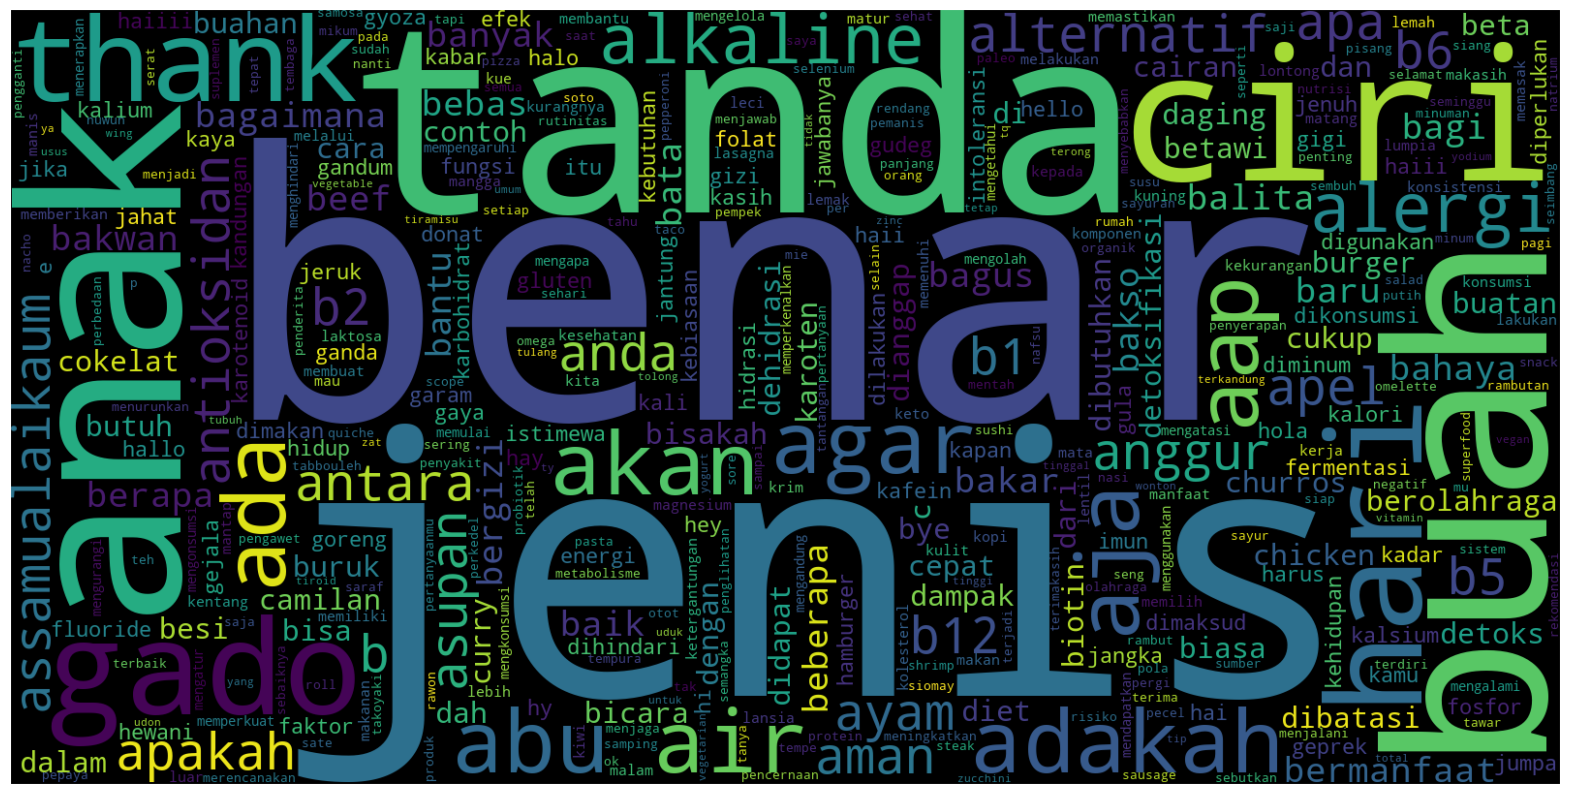

In [72]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(words))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
# Generate BERT embeddings for each pattern
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    # Compute the mean of the last hidden state across the sequence length
    mean_embeddings = tf.reduce_mean(last_hidden_state, axis=1)
    return mean_embeddings.numpy()

In [16]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    pattern_words = ' '.join(doc[0])
    bag = get_bert_embeddings([pattern_words])[0]
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype="object")
train_x = np.array(training[:, 0].tolist())
train_y = np.array(training[:, 1].tolist())

In [17]:
# Reshape train_x to be 3D for LSTM input
train_x = np.expand_dims(train_x, axis=1)

In [58]:
# Build the model with LSTM layers
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_y[0]), activation='softmax')
])

In [59]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 128)            459264    
                                                                 
 dropout_61 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_21 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 209)               13585     
                                                                 
Total params: 522257 (1.99 MB)
Trainable params: 522257 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# Visualisasikan model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [61]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
32/32 [==============================] - 3s 8ms/step - loss: 5.3343 - accuracy: 0.0166
Epoch 2/500
32/32 [==============================] - 0s 8ms/step - loss: 5.2706 - accuracy: 0.0400
Epoch 3/500
32/32 [==============================] - 0s 7ms/step - loss: 5.1301 - accuracy: 0.0508
Epoch 4/500
32/32 [==============================] - 0s 8ms/step - loss: 4.8934 - accuracy: 0.0732
Epoch 5/500
32/32 [==============================] - 0s 8ms/step - loss: 4.6655 - accuracy: 0.0986
Epoch 6/500
32/32 [==============================] - 0s 8ms/step - loss: 4.3964 - accuracy: 0.1406
Epoch 7/500
32/32 [==============================] - 0s 7ms/step - loss: 4.1421 - accuracy: 0.1855
Epoch 8/500
32/32 [==============================] - 0s 7ms/step - loss: 3.9332 - accuracy: 0.2266
Epoch 9/500
32/32 [==============================] - 0s 7ms/step - loss: 3.7105 - accuracy: 0.2783
Epoch 10/500
32/32 [==============================] - 0s 7ms/step - loss: 3.5032 - accuracy: 0.3320
Epoch 11/

In [47]:
model.save('chatbot.h5')

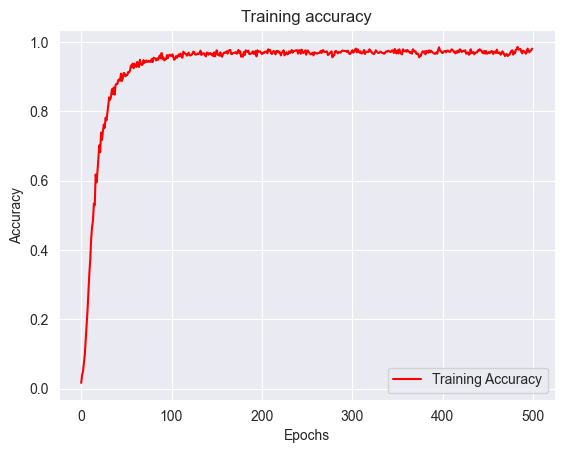

<Figure size 640x480 with 0 Axes>

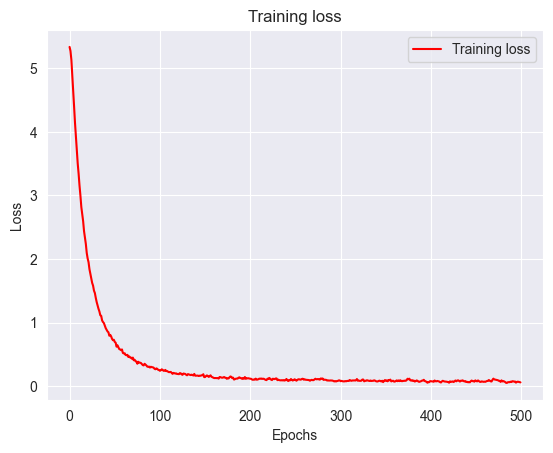

<Figure size 640x480 with 0 Axes>

In [69]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

# Membuat grafik plot untuk accuracy
plt.plot(epochs, acc, 'r', label ='Training Accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Membuat grafik plot untuk loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [63]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
predictions = model.predict(train_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(train_y, axis=1)

# Compute metrics
report = classification_report(true_classes, predicted_classes, target_names=classes)
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

32/32 [==============================] - 1s 3ms/step
Accuracy: 0.9833984375
Classification Report:
                                  precision    recall  f1-score   support

                   alergi_gandum       1.00      1.00      1.00         5
                  alergi_makanan       1.00      1.00      1.00         7
                             ash       1.00      1.00      1.00         3
                     asupan_gizi       1.00      1.00      1.00         5
                       bCarotene       1.00      1.00      1.00         3
                     buah-buahan       1.00      1.00      1.00         7
                   camilan_sehat       1.00      1.00      1.00         5
                          copper       1.00      1.00      1.00         3
                   detoksifikasi       1.00      1.00      1.00         5
                            diet       1.00      1.00      1.00         3
                      diet Paleo       1.00      1.00      1.00         5
            

In [64]:
model.evaluate(train_x, train_y)

32/32 [==============================] - 1s 3ms/step - loss: 0.0259 - accuracy: 0.9834


[0.025890076532959938, 0.9833984375]

In [65]:
results = model.evaluate(train_x, train_y, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

32/32 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9834
    Test Loss: 0.02589
Test Accuracy: 98.34%


5/5 [==============================] - 1s 6ms/step


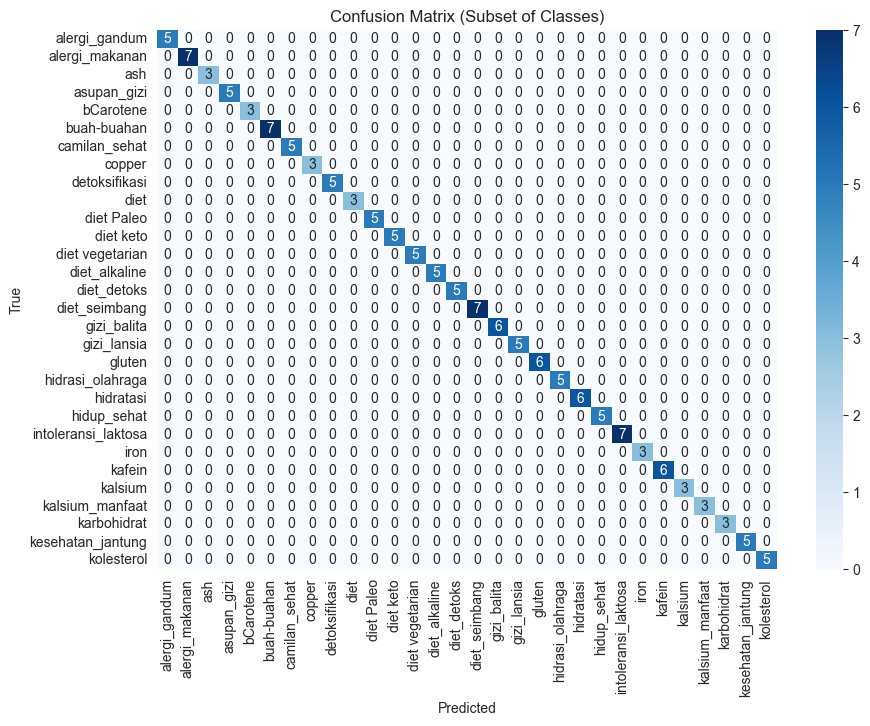

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the subset of classes to use
subset_classes = classes[:30]  # Use the first 30 classes (adjust as needed)
subset_indices = [classes.index(cls) for cls in subset_classes]

# Filter train_x and train_y to include only the subset of classes
subset_train_x = [x for i, x in enumerate(train_x) if np.argmax(train_y[i]) in subset_indices]
subset_train_y = [y for i, y in enumerate(train_y) if np.argmax(y) in subset_indices]

# Convert lists to numpy arrays
subset_train_x = np.array(subset_train_x)
subset_train_y = np.array(subset_train_y)

# Make predictions on the filtered training set
conf_predictions = model.predict(subset_train_x)
conf_predictions = np.argmax(conf_predictions, axis=1)  # Convert predictions to class indices
conf_y_true = np.argmax(subset_train_y, axis=1)  # Convert true labels to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(conf_y_true, conf_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subset_classes, yticklabels=subset_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Subset of Classes)')
plt.show()

5/5 [==============================] - 0s 4ms/step


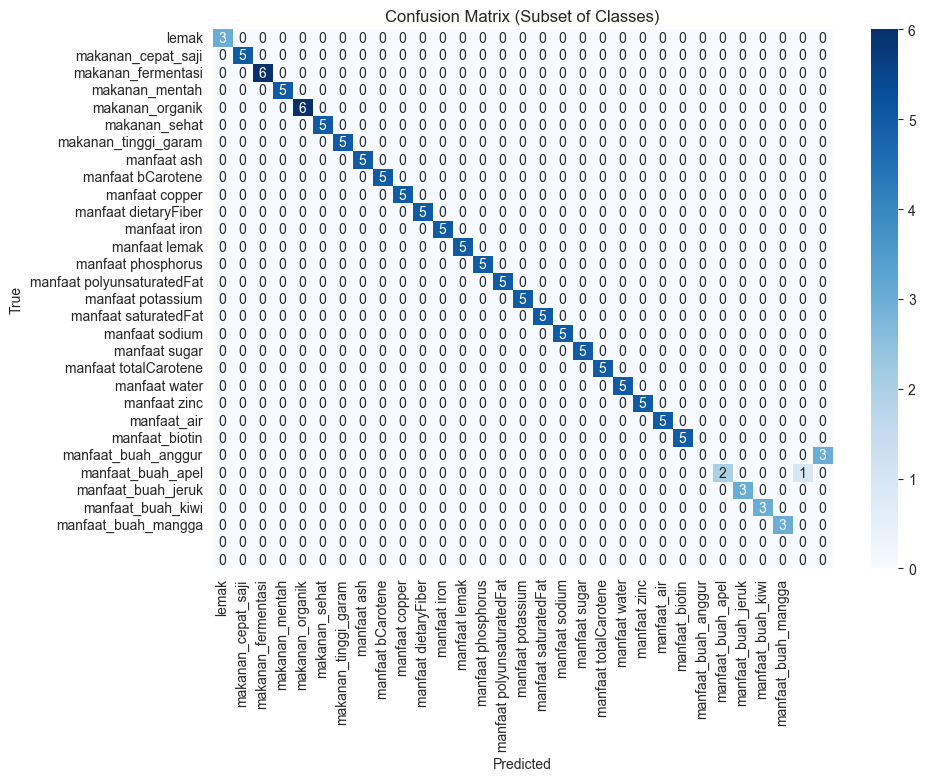

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the subset of classes to use
subset_classes = classes[31:60]  # Use the first 30 classes (adjust as needed)
subset_indices = [classes.index(cls) for cls in subset_classes]

# Filter train_x and train_y to include only the subset of classes
subset_train_x = [x for i, x in enumerate(train_x) if np.argmax(train_y[i]) in subset_indices]
subset_train_y = [y for i, y in enumerate(train_y) if np.argmax(y) in subset_indices]

# Convert lists to numpy arrays
subset_train_x = np.array(subset_train_x)
subset_train_y = np.array(subset_train_y)

# Make predictions on the filtered training set
conf_predictions = model.predict(subset_train_x)
conf_predictions = np.argmax(conf_predictions, axis=1)  # Convert predictions to class indices
conf_y_true = np.argmax(subset_train_y, axis=1)  # Convert true labels to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(conf_y_true, conf_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subset_classes, yticklabels=subset_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Subset of Classes)')
plt.show()